# PARALLEL COORDINATES PLOT

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
data=pd.read_excel('Book1.xlsx')
data.head(2)

,Age,Income,No of ppl in HH,Time to reach DCC,No of ppl accom,Spent,Marital Status
0,21.5,21250.5,3,28.0,3,625.5,Single (never married)
1,21.5,21250.5,4,120.0,4,0.0,Single (never married)


## Standardize features by removing the mean and scaling to unit variance

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [4]:
scaler.fit(data.drop('Marital Status',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
scaled_features = scaler.transform(data.drop('Marital Status',axis=1))

In [6]:
data.columns[:-1]
#All columns names except last one, which is target

Index(['Age', 'Income', 'No of ppl in HH', 'Time to reach DCC',
       'No of ppl accom', 'Spent'],
      dtype='object')

In [7]:
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df_feat.head()

,Age,Income,No of ppl in HH,Time to reach DCC,No of ppl accom,Spent
0,-1.351121,0.060512,-0.386596,0.715764,0.508290,0.670574
1,-1.351121,0.060512,0.130906,7.767256,1.122149,-0.916342
2,0.030444,-0.641173,0.130906,-0.472259,0.508290,-0.916342
3,2.733505,-0.290331,-0.904099,1.482230,-0.105568,-0.534518
4,-0.570236,-0.114909,-0.904099,-0.472259,-0.105568,0.099741


In [8]:
df_feat['Marital Status']=data['Marital Status'] #Categorize w.r.t Marital Status

In [9]:
df_feat

,Age,Income,No of ppl in HH,Time to reach DCC,No of ppl accom,Spent,Marital Status
0,-1.351121,0.060512,-0.386596,0.715764,0.508290,0.670574,Single (never married)
1,-1.351121,0.060512,0.130906,7.767256,1.122149,-0.916342,Single (never married)
2,0.030444,-0.641173,0.130906,-0.472259,0.508290,-0.916342,Married with children
3,2.733505,-0.290331,-0.904099,1.482230,-0.105568,-0.534518,Married with no children
4,-0.570236,-0.114909,-0.904099,-0.472259,-0.105568,0.099741,Single (never married)
5,-1.351121,0.762197,-0.904099,-0.050703,-1.333284,-0.534518,Single (never married)
6,-1.351121,-0.290331,0.648408,5.467856,0.508290,0.099741,Single (never married)
7,-0.570236,-0.974474,-0.386596,-0.472259,-1.333284,-0.534518,Single (never married)
8,0.631124,-0.290331,-0.386596,0.715764,-0.105568,1.304833,Married (family in home country)
9,1.532145,-1.184979,-0.904099,-0.472259,-1.333284,-0.916342,Married (family in home country)


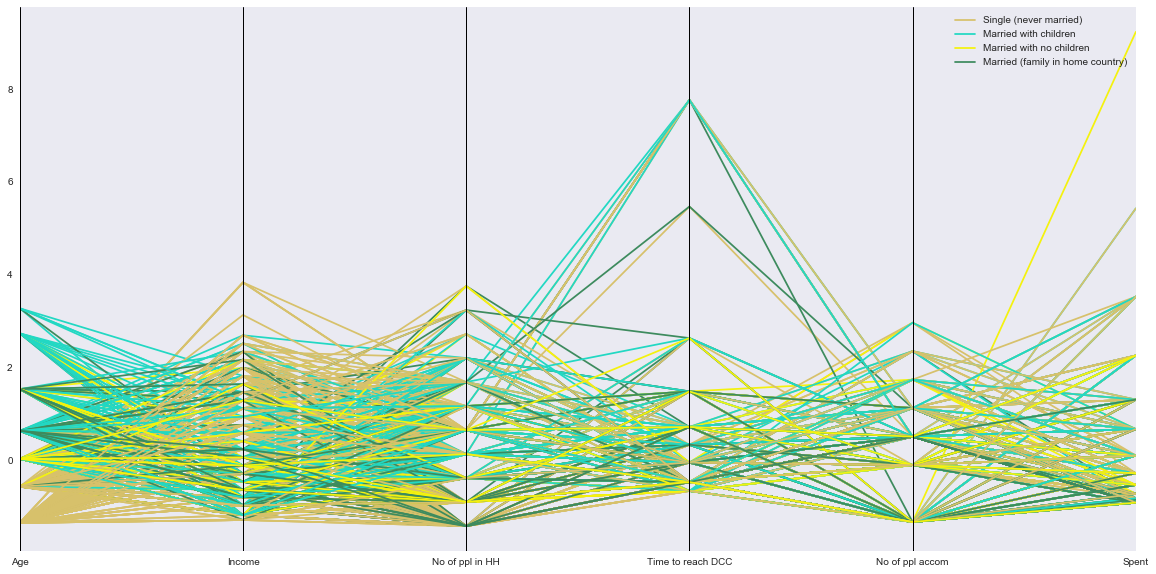

In [10]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(20,10))
parallel_coordinates(df_feat, 'Marital Status')
plt.show()

## Transforms features by scaling each feature to a given range (0,1)

In [12]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [16]:
data1=data.iloc[:,0:6]
type(data1)

pandas.core.frame.DataFrame

In [18]:
min_max_scaler = preprocessing.MinMaxScaler()
data_minmax = min_max_scaler.fit_transform(data1)
data_minmax

array([[ 0.        ,  0.26370367,  0.2       ,  0.16363636,  0.42857143,
         0.15635546],
       [ 0.        ,  0.26370367,  0.3       ,  1.        ,  0.57142857,
         0.        ],
       [ 0.2987013 ,  0.12671831,  0.3       ,  0.02272727,  0.42857143,
         0.        ],
       ..., 
       [ 0.42857143,  0.29795001,  0.        ,  0.02272727,  0.42857143,
         0.21884764],
       [ 0.2987013 ,  0.50342806,  0.4       ,  0.16363636,  0.42857143,
         0.31258593],
       [ 0.2987013 ,  0.26370367,  0.1       ,  0.02272727,  0.        ,
         0.        ]])

In [19]:
df_minmax = pd.DataFrame(data_minmax,columns=data.columns[:-1])
df_minmax.head()

,Age,Income,No of ppl in HH,Time to reach DCC,No of ppl accom,Spent
0,0.000000,0.263704,0.2,0.163636,0.428571,0.156355
1,0.000000,0.263704,0.3,1.000000,0.571429,0.000000
2,0.298701,0.126718,0.3,0.022727,0.428571,0.000000
3,0.883117,0.195211,0.1,0.254545,0.285714,0.037620
4,0.168831,0.229457,0.1,0.022727,0.285714,0.100112


In [20]:
df_minmax['Marital Status']=data['Marital Status']

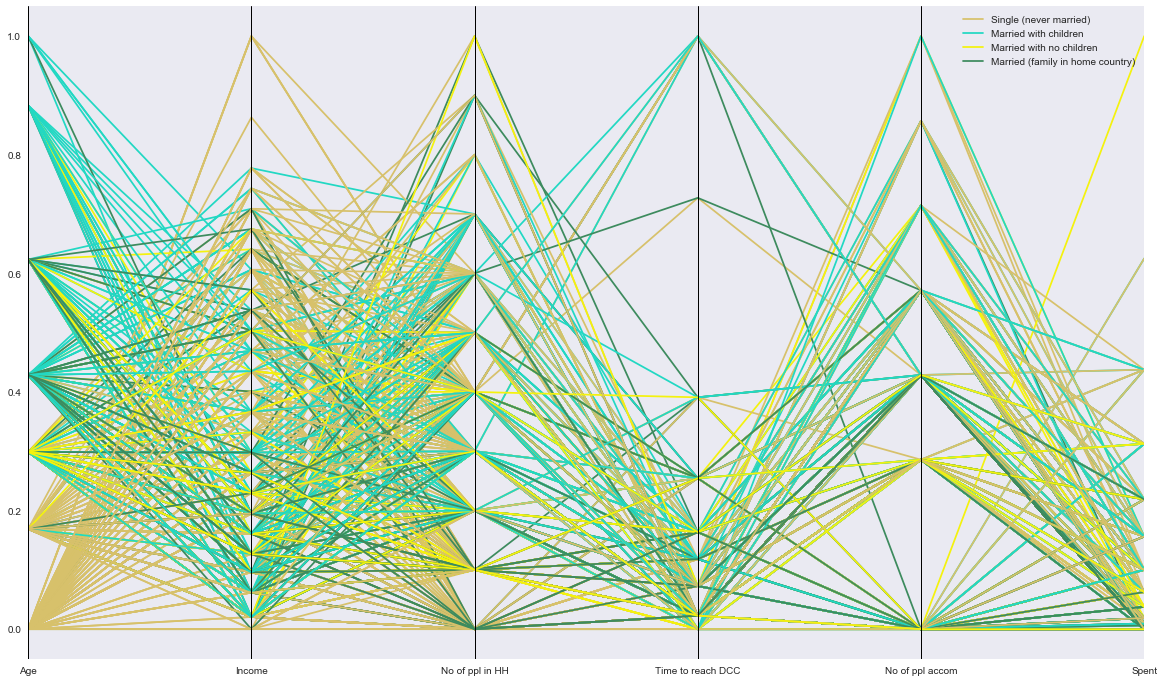

In [22]:
plt.figure(figsize=(20,12))
parallel_coordinates(df_minmax, 'Marital Status')
plt.show()